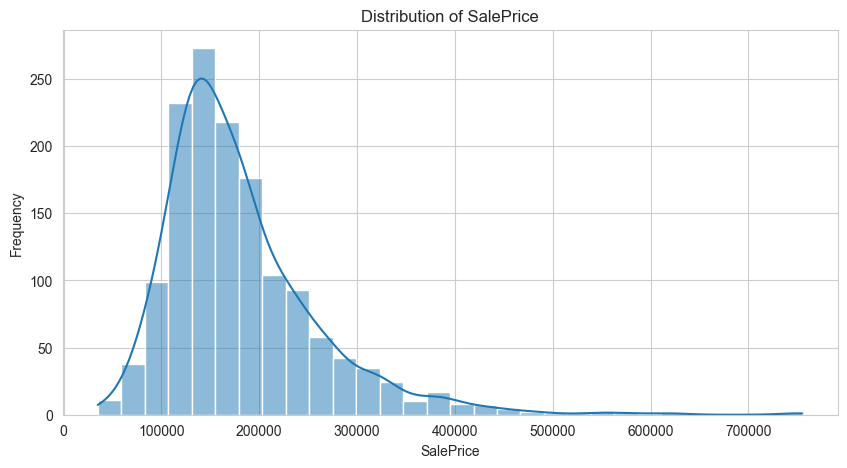

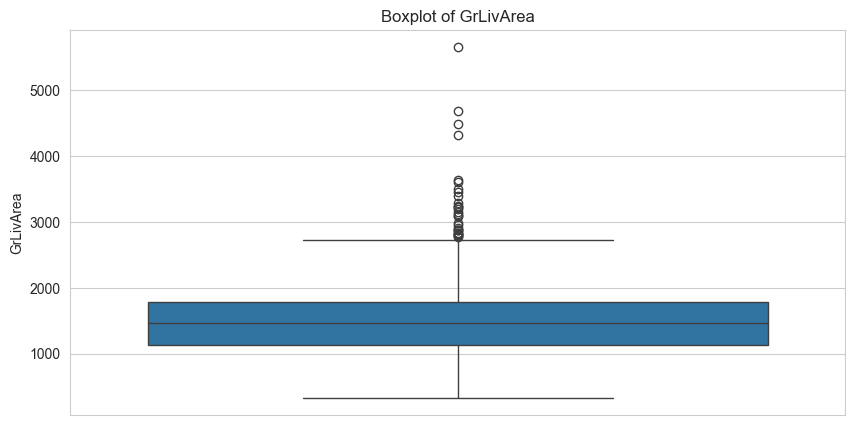

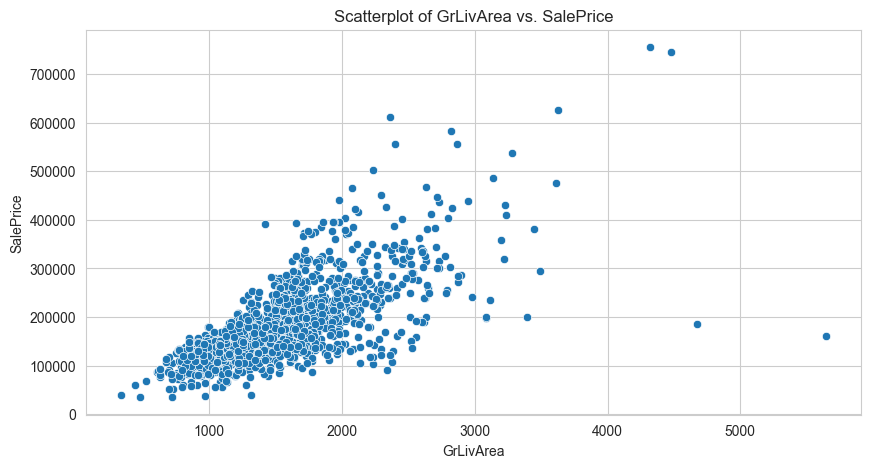

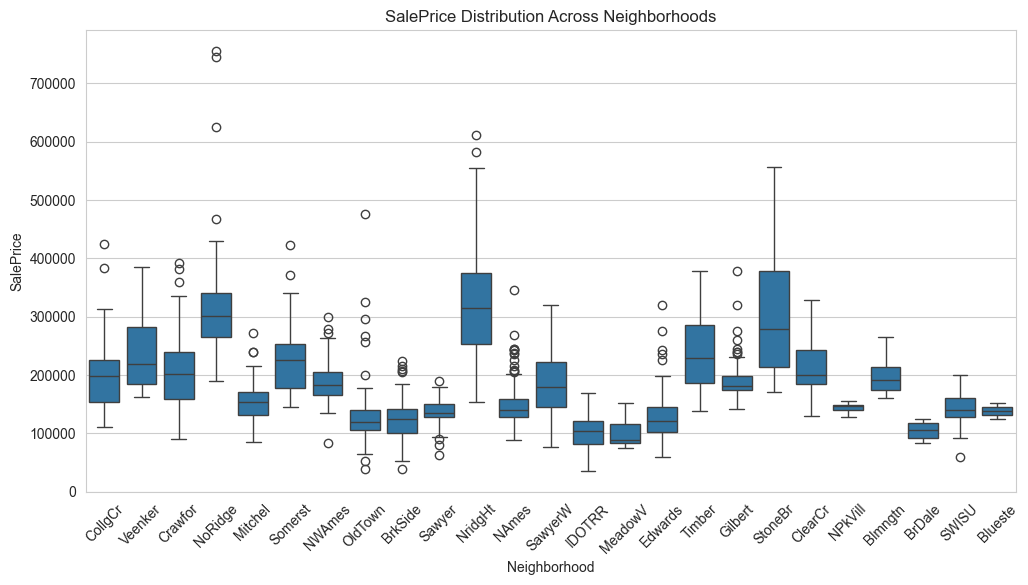

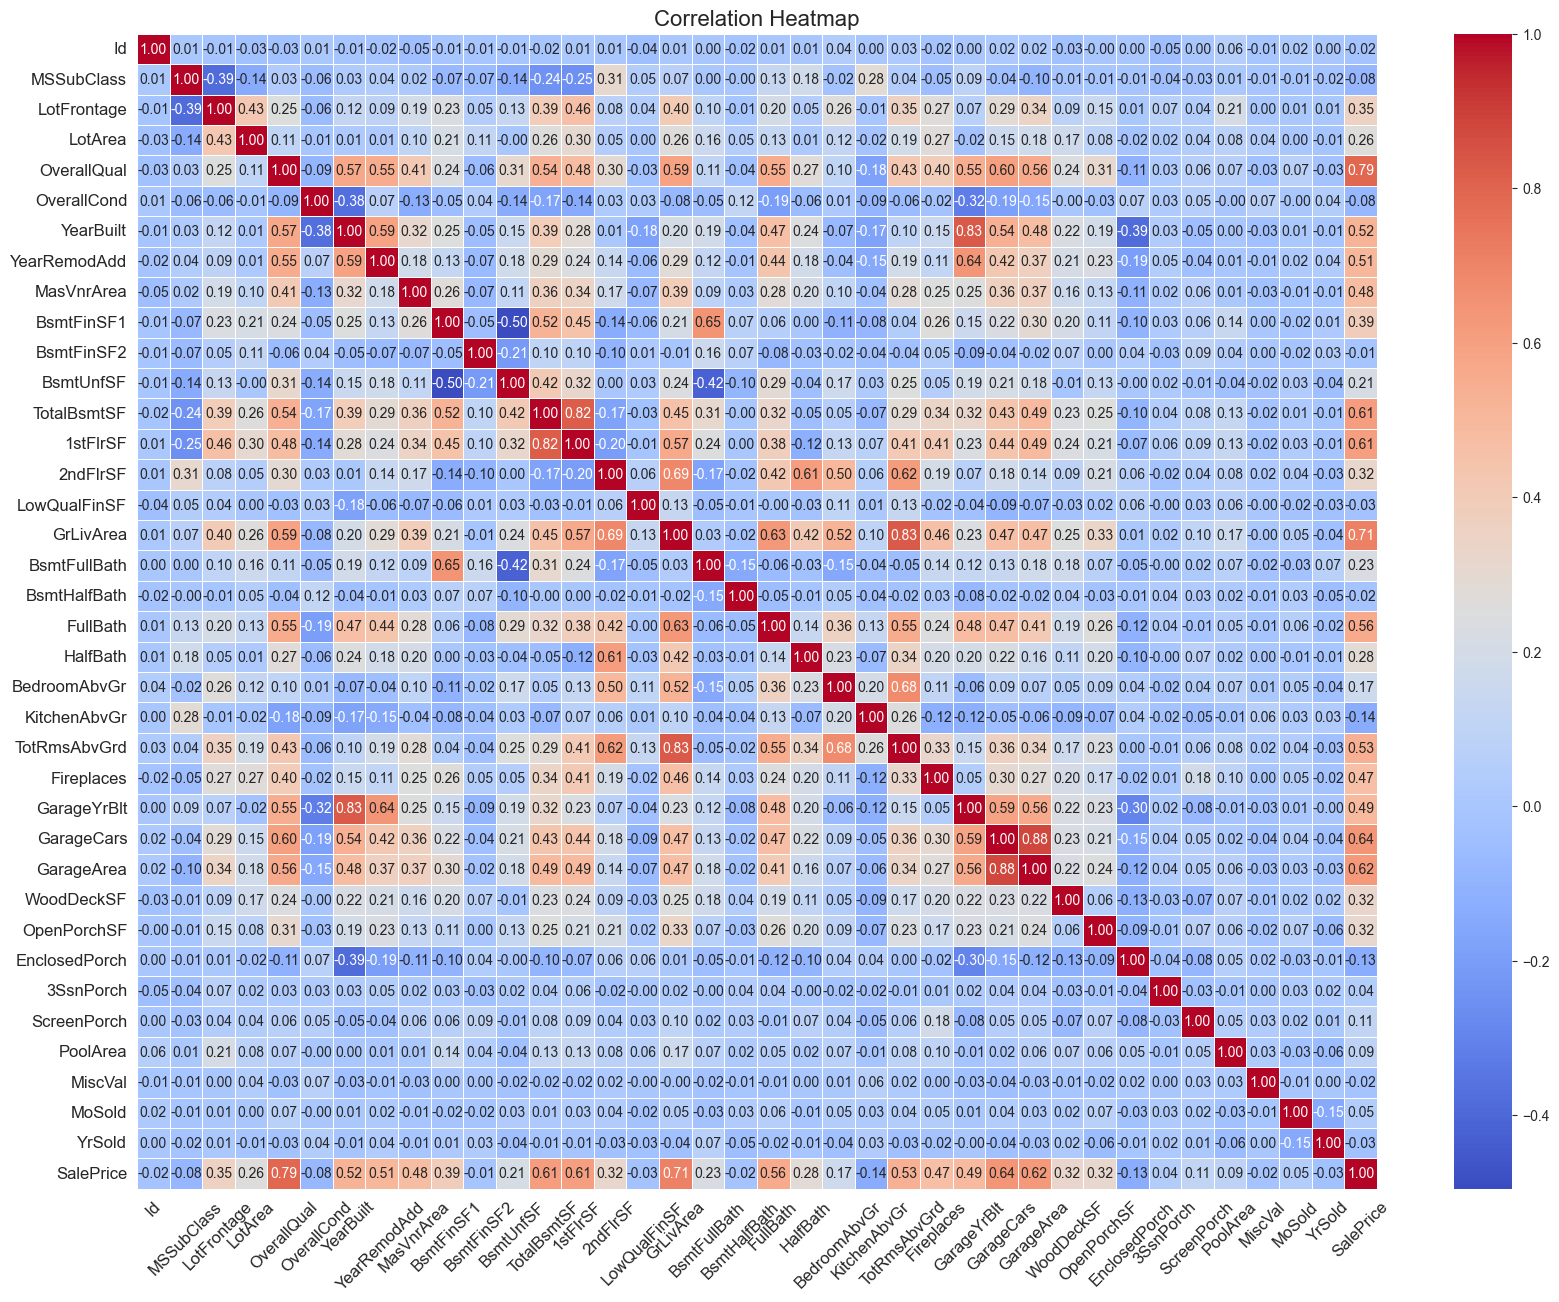

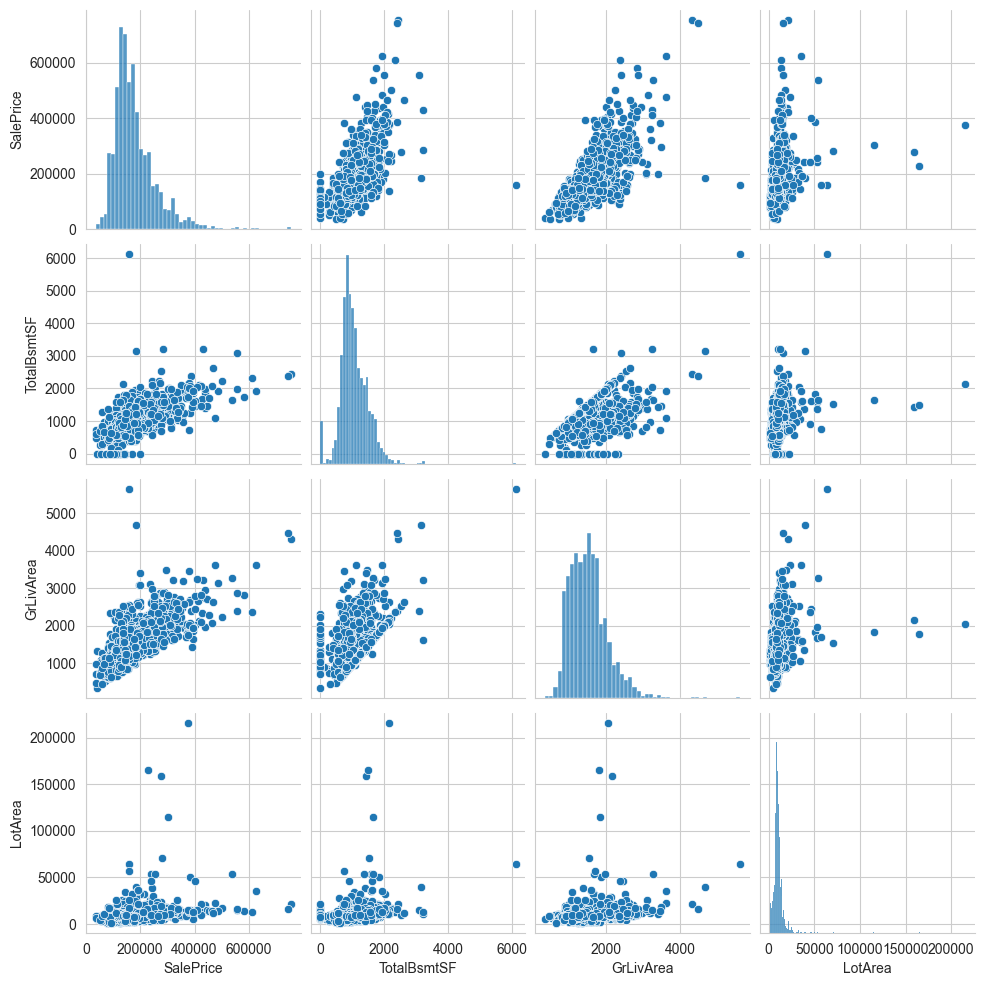

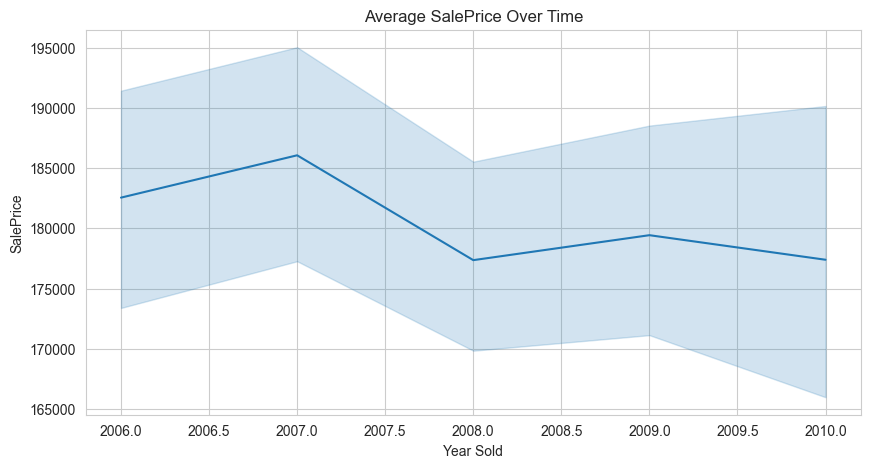

(F_onewayResult(statistic=95.28410630774302, pvalue=1.2519558385662742e-35),
 88.43116541471059,
 1.626510734741343e-06)

In [6]:
import pandas as pd
# Load Dataset
data = pd.read_csv("train.csv")

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Set plot style
sns.set_style("whitegrid")

# 1. Distribution of SalePrice (Histogram + KDE)
plt.figure(figsize=(10, 5))
sns.histplot(data['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# 2. Boxplot for detecting outliers in GrLivArea
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['GrLivArea'])
plt.title("Boxplot of GrLivArea")
plt.ylabel("GrLivArea")
plt.show()

# 3. Scatterplot of GrLivArea vs. SalePrice
plt.figure(figsize=(10, 5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title("Scatterplot of GrLivArea vs. SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

# 4. Boxplot for Neighborhood vs. SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.xticks(rotation=45)
plt.title("SalePrice Distribution Across Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.show()

# 5. Correlation Heatmap
# Increase the figure size 
plt.figure(figsize=(20, 15))  

# Generate the heatmap with larger font size for annotations
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), 
            cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, 
            annot_kws={"size": 10})  # Increase annotation size

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels 
plt.yticks(fontsize=12)  # Adjust y-axis font size

plt.show()


# 6. Pairplot for Selected Features
selected_features = ['SalePrice', 'TotalBsmtSF', 'GrLivArea', 'LotArea']
sns.pairplot(data[selected_features])
plt.show()

# 7. Line Plot for SalePrice over Years Sold
plt.figure(figsize=(10, 5))
sns.lineplot(x='YrSold', y='SalePrice', data=data)
plt.title("Average SalePrice Over Time")
plt.xlabel("Year Sold")
plt.ylabel("SalePrice")
plt.show()

# 8. ANOVA Test (Checking if Neighborhood affects SalePrice)
anova_result = stats.f_oneway(
    data[data['Neighborhood'] == 'NAmes']['SalePrice'],
    data[data['Neighborhood'] == 'CollgCr']['SalePrice'],
    data[data['Neighborhood'] == 'OldTown']['SalePrice']
)

# 9. Chi-Square Test (Dependency between HouseStyle and SaleCondition)
chi2_stat, p_value, _, _ = stats.chi2_contingency(pd.crosstab(data['HouseStyle'], data['SaleCondition']))

anova_result, chi2_stat, p_value


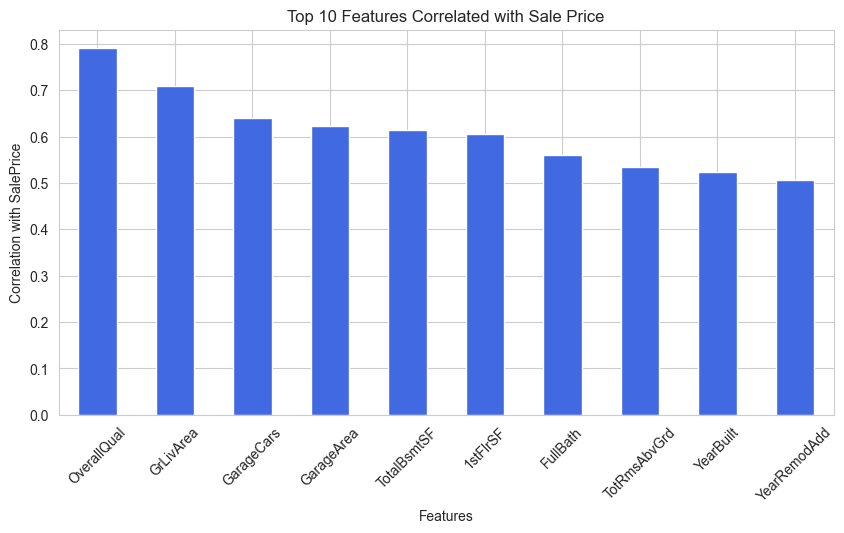

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numeric features
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation with SalePrice
corr_matrix = numeric_data.corr()['SalePrice'].sort_values(ascending=False)

# Plot the top 10 correlated features
top_features = corr_matrix[1:11]  # Exclude SalePrice itself

plt.figure(figsize=(10, 5))
top_features.plot(kind='bar', color='royalblue')
plt.title("Top 10 Features Correlated with Sale Price")
plt.xlabel("Features")
plt.ylabel("Correlation with SalePrice")
plt.xticks(rotation=45)
plt.show()
